In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.ndimage

# Get data from CSV's

In [193]:
trainData = pd.read_csv("housing_train_clean.csv")
testData = pd.read_csv("housing_test_clean.csv")
trainData.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,True,False,False,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,3,True,False,False,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,3,True,False,False,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008
3,961,756,0,3,True,False,False,False,False,False,...,False,True,7,756,True,False,0,1915,1970,2006
4,1145,1053,0,4,True,False,False,False,False,False,...,False,True,9,1145,True,False,192,2000,2000,2008


In [194]:
testData.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010


In [195]:
trainData.shape, trainData.isnull().sum().sum(), testData.shape, testData.isnull().sum().sum()

((1460, 272), 0, (1459, 272), 0)

# Get Y_train and X_train

In [196]:
Y_train = trainData['SalePrice']
Y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [197]:
X_train = trainData.drop('SalePrice', axis=1)
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,True,False,False,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,3,True,False,False,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,3,True,False,False,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008
3,961,756,0,3,True,False,False,False,False,False,...,False,True,7,756,True,False,0,1915,1970,2006
4,1145,1053,0,4,True,False,False,False,False,False,...,False,True,9,1145,True,False,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,3,True,False,False,False,False,False,...,False,True,7,953,True,False,0,1999,2000,2007
1456,2073,0,0,3,True,False,False,False,False,False,...,False,True,7,1542,True,False,349,1978,1988,2010
1457,1188,1152,0,4,True,False,False,False,False,False,...,False,True,9,1152,True,False,0,1941,2006,2010
1458,1078,0,0,2,True,False,False,False,False,False,...,False,True,5,1078,True,False,366,1950,1996,2010


In [198]:
Y_train.shape, X_train.shape

((1460,), (1460, 271))

# Get X_test and Y_test

In [199]:
Y_test = testData['SalePrice']
Y_test

0       120376.994315
1       152387.635505
2       185025.193763
3       198385.651258
4       185934.885245
            ...      
1454     85890.984520
1455     83811.680275
1456    160189.586559
1457    115398.604894
1458    224009.963740
Name: SalePrice, Length: 1459, dtype: float64

In [200]:
X_test = testData.drop('SalePrice', axis=1)
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,1,0,0,0,0,0,...,0,1,5,882.0,1,0,140,1961,1961,2010
1,1329,0,0,3,1,0,0,0,0,0,...,0,1,6,1329.0,1,0,393,1958,1958,2010
2,928,701,0,3,1,0,0,0,0,0,...,0,1,6,928.0,1,0,212,1997,1998,2010
3,926,678,0,3,1,0,0,0,0,0,...,0,1,7,926.0,1,0,360,1998,1998,2010
4,1280,0,0,2,0,0,0,0,1,0,...,0,1,5,1280.0,1,0,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0,0,0,1,0,0,...,0,1,5,546.0,1,0,0,1970,1970,2006
1455,546,546,0,3,0,0,0,0,1,0,...,0,1,6,546.0,1,0,0,1970,1970,2006
1456,1224,0,0,4,1,0,0,0,0,0,...,0,1,7,1224.0,1,0,474,1960,1996,2006
1457,970,0,0,3,1,0,0,0,0,0,...,0,1,6,912.0,1,0,80,1992,1992,2006


In [201]:
Y_test.shape, X_test.shape

((1459,), (1459, 271))

# Convert pandas datatype to Numpy array

In [202]:
X_train = X_train.values
Y_train = Y_train.values.reshape(-1)

X_test = X_test.values
Y_test = Y_test.values.reshape(-1)

# Normalize X_train and X_test using MinMaxScaler

In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
X_train, X_train.shape, Y_train.shape

(array([[0.11977972, 0.41355932, 0.        , ..., 0.94927536, 0.88333333,
         0.5       ],
        [0.21294172, 0.        , 0.        , ..., 0.75362319, 0.43333333,
         0.25      ],
        [0.13446535, 0.41937046, 0.        , ..., 0.93478261, 0.86666667,
         0.5       ],
        ...,
        [0.19596145, 0.55786925, 0.        , ..., 0.5       , 0.93333333,
         1.        ],
        [0.17072051, 0.        , 0.        , ..., 0.56521739, 0.76666667,
         1.        ],
        [0.21156494, 0.        , 0.        , ..., 0.67391304, 0.25      ,
         0.5       ]]),
 (1460, 271),
 (1460,))

In [205]:
X_test, X_test.shape, Y_test.shape

(array([[0.12895824, 0.        , 0.        , ..., 0.64492754, 0.18333333,
         1.        ],
        [0.22831574, 0.        , 0.        , ..., 0.62318841, 0.13333333,
         1.        ],
        [0.13630106, 0.33946731, 0.        , ..., 0.9057971 , 0.8       ,
         1.        ],
        ...,
        [0.20422212, 0.        , 0.        , ..., 0.63768116, 0.76666667,
         0.        ],
        [0.1459385 , 0.        , 0.        , ..., 0.86956522, 0.7       ,
         0.        ],
        [0.15190454, 0.48619855, 0.        , ..., 0.87681159, 0.73333333,
         0.        ]]),
 (1459, 271),
 (1459,))

# KNeighborsRegressor

In [206]:
from sklearn.neighbors import KNeighborsRegressor
KNNmodel = KNeighborsRegressor()

In [207]:
KNNmodel.fit(X_train, Y_train)

KNeighborsRegressor()

In [208]:
Y_test_pred_KNN = KNNmodel.predict(X_test)

In [209]:
MSE_test_KNN = np.mean((Y_test_pred_KNN - Y_test)**2)
MSE_test_KNN

1449739163.168019

In [210]:
MAE_test_KNN = np.mean(np.abs(Y_test - Y_test_pred_KNN))
MAE_test_KNN

22904.907958648553

In [211]:
MAPE_test_KNN = np.mean(np.abs((Y_test - Y_test_pred_KNN) / Y_test))
MAPE_test_KNN

0.1281124148291369

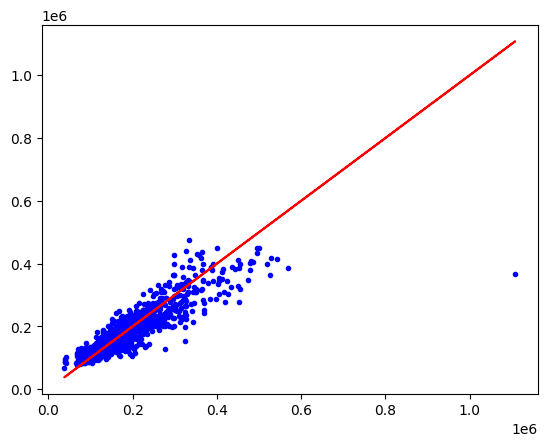

In [212]:
# plot the 45 degree line
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test_pred_KNN, '.b')
ax.plot(Y_test, Y_test, '-r')

# Linear Regression

In [213]:
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()

In [214]:
LRmodel.fit(X_train, Y_train)

LinearRegression()

In [215]:
Y_test_pred_LR = LRmodel.predict(X_test)

In [216]:
MSE_test_LR = np.mean((Y_test_pred_LR - Y_test)**2)
MSE_test_LR

446268193.6008431

In [217]:
MAE_test_LR = np.mean(np.abs(Y_test - Y_test_pred_LR))
MAE_test_LR

11869.968271413176

In [218]:
MAPE_test_LR = np.mean(np.abs((Y_test - Y_test_pred_LR) / Y_test))
MAPE_test_LR

0.07194506603824355

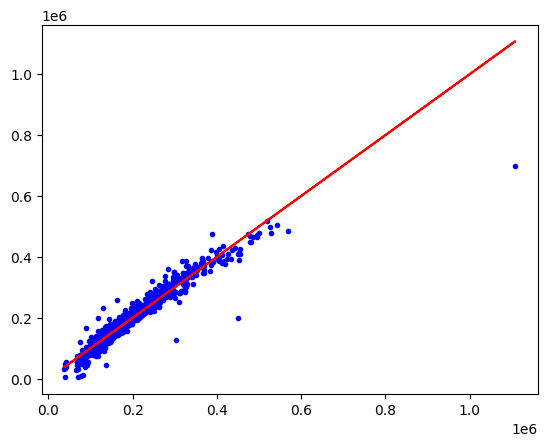

In [219]:
# plot the 45 degree line
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test_pred_LR, '.b')
ax.plot(Y_test, Y_test, '-r')

# Decision Tree Regressor

In [220]:
from sklearn.tree import DecisionTreeRegressor
DTmodel = DecisionTreeRegressor()

In [221]:
DTmodel.fit(X_train, Y_train)

DecisionTreeRegressor()

In [222]:
Y_test_pred_DT = DTmodel.predict(X_test)

In [223]:
MSE_test_DT = np.mean((Y_test_pred_DT - Y_test)**2)
MSE_test_DT

1570120592.6529796

In [224]:
MAE_test_DT = np.mean(np.abs(Y_test - Y_test_pred_DT))
MAE_test_DT

22023.631400122697

In [225]:
MAPE_test_DT = np.mean(np.abs((Y_test - Y_test_pred_DT) / Y_test))
MAPE_test_DT

0.11948842905435395

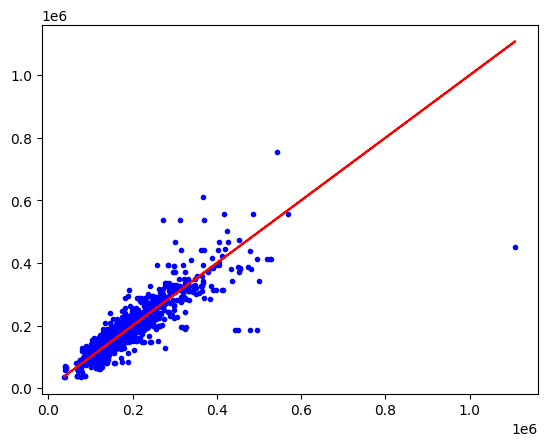

In [226]:
# plot the 45 degree line
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test_pred_DT, '.b')
ax.plot(Y_test, Y_test, '-r')

# Random Forest Regressor

In [227]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()

In [228]:
RFmodel.fit(X_train, Y_train)

RandomForestRegressor()

In [229]:
Y_test_pred_RF = RFmodel.predict(X_test)

In [230]:
MSE_test_RF = np.mean((Y_test_pred_RF - Y_test)**2)
MSE_test_RF

612980614.7888968

In [231]:
MAE_test_RF = np.mean(np.abs(Y_test - Y_test_pred_RF))
MAE_test_RF

10943.981166832857

In [232]:
MAPE_test_RF = np.mean(np.abs((Y_test - Y_test_pred_RF) / Y_test))
MAPE_test_RF

0.06248458734937032

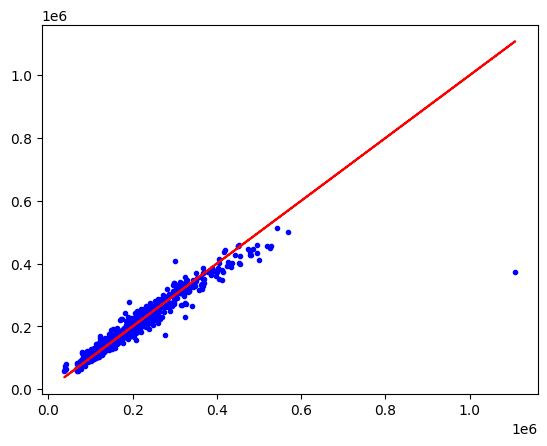

In [233]:
# plot the 45 degree line
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test_pred_RF, '.b')
ax.plot(Y_test, Y_test, '-r')

In [234]:
MSE = [MSE_test_KNN, MSE_test_LR, MSE_test_DT, MSE_test_RF]
MAE = [MAE_test_KNN, MAE_test_LR, MAE_test_DT, MAE_test_RF]
MAPE = [MAPE_test_KNN, MAPE_test_LR, MAPE_test_DT, MAPE_test_RF]
rows = ["MSE", "MAE", "MAPE"]
cols = ["KNeighbors Regressor", "Linear Regression", "DecisionTree Regressor", "RandomForest Regressor"]

In [235]:
results = pd.DataFrame((MSE, MAE, MAPE), index=rows, columns=cols)
results.head()

,KNeighbors Regressor,Linear Regression,DecisionTree Regressor,RandomForest Regressor
MSE,1.449739e+09,4.462682e+08,1.570121e+09,6.129806e+08
MAE,2.290491e+04,1.186997e+04,2.202363e+04,1.094398e+04
MAPE,1.281124e-01,7.194507e-02,1.194884e-01,6.248459e-02
